In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

# Hough Line Detection

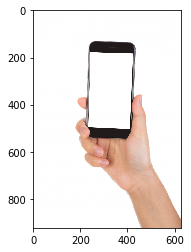

In [12]:
# Read in the image
phone_image = cv2.imread('Images/phone.jpg')

# Change color to RGB (from BGR)
phone_image = cv2.cvtColor(phone_image, cv2.COLOR_BGR2RGB)

plt.imshow(phone_image)

### Realizar detección de bordes

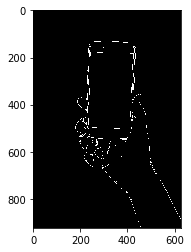

In [17]:
# Convert image to grayscale
gray_phone = cv2.cvtColor(phone_image, cv2.COLOR_RGB2GRAY)

# Define thresholds
min_threshold = 50
max_threshold = 100

# Apply Canny Edge Detection
edges = cv2.Canny(gray_phone, min_threshold, max_threshold)

plt.imshow(edges, cmap="gray")

### Buscar las líneas utilizando la transformada de Hough

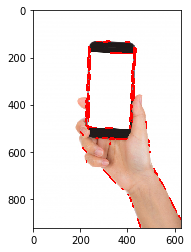

In [18]:
# Define the Hough transform parameters
# Make a blank the same size as out image to draw on
rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 50
max_line_gap = 5

line_image = np.copy(phone_image)

# Run Hough on the edge-detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image, (x1,y1),(x2,y2), (255,0,0), 5)

plt.imshow(line_image)

# Hough Circle Detection

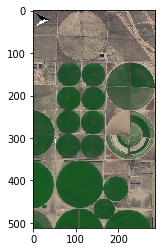

In [25]:
farms_image = cv2.imread("Images/round-farms.jpg")
farms_image = cv2.cvtColor(farms_image, cv2.COLOR_BGR2RGB)
plt.imshow(farms_image)

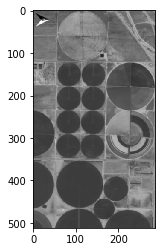

In [26]:
gray_farms = cv2.cvtColor(farms_image, cv2.COLOR_RGB2GRAY)

# Apply blur
gray_farms_blur = cv2.GaussianBlur(gray_farms, (3, 3), 0)

plt.imshow(gray_farms_blur, cmap="gray")

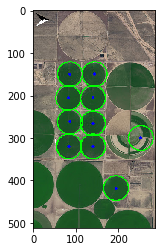

In [38]:
# For drawing circles on
circles_image = np.copy(farms_image)

circles = cv2.HoughCircles(gray_farms_blur, cv2.HOUGH_GRADIENT, 1,
                           minDist = 45,
                           param1 = 70,
                           param2 = 11,
                           minRadius = 29,
                           maxRadius = 30)
# Convert circles into expected type
circles = np.uint16(np.around(circles))

# Draw each circles
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(circles_image,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circles_image,(i[0],i[1]),2,(0,0,255),3)

    plt.imshow(circles_image)